In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Filtering

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data[['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [10]:
sum(data['Sex'] == 'male')

577

### Check how many person were survived .

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
sum(data['Survived'] == 1)

342

## Check NULL values is dataset.

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

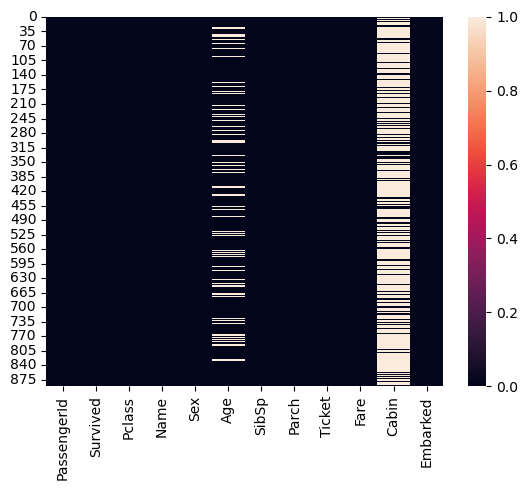

In [14]:
sns.heatmap(data.isnull())

### Find the Percentage of Null values.

In [15]:
data.isnull().sum()*100/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Drop the columns having null values more than 70%.

In [16]:
data.drop(['Cabin'], axis=1, inplace=True)

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Handle missing values

#### 1. Filling up the values for 'Embarked' column.

In [18]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

<p style="color:green; font-size: 18px"><code>mode()</code> method displays the most frequent value.</p>

In [20]:
data['Embarked'].fillna('S', inplace=True)

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<p style="color:green; font-size: 18px;">In this way, we can handle the values of <code>categorical</code> or <code>object</code> datatype columns.</p>

#### Handling the missing values of numerical column.
We can handle values either with `mean`, `min` or `max`.

In [22]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [24]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Categorical Data Encoding
Categorical data refers to a form of information that can be stored and identified based on their names or labels. It is a type of qualitative data that can be grouped into categories instead of being measured numerically. such as `male or female`, `Yes or No`</br></br>

Categorical data encoding is a vital step in preparing data for machine learning (ML) tasks because most ML algorithms require numerical input. Categorical data, such as text labels or data that can be classified into categories or groups, often has non-numeric values. Encoding categorical data transforms it into a numerical format so that the model can identify patterns and make predictions. Encoding can also help prevent bias in the model by ensuring that all features are equally weighted.

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### We will perfomn encoding on 'Sex' column.

It is must to know the number of categories present on particular column.

In [26]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
data['Gender'] = data['Sex'].map({'male':1, 'female':0})

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


### Inserting column at particular position using `insert()` method.

In [29]:
x = data['Sex'].map({'male':1, 'female':0})

In [30]:
data.insert(loc=5, column='Gender_new', value=x)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,S,1


In [32]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### pd.get_dummies() method

This method can be used to encode the `categorical` data, if there are more than `2` categories.</br>
This method will create the columns equal to the number of categories present in particular</br> column we want to encode, and deletes the original column.

In [33]:
pd.get_dummies(data, columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,0,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,1,True,False,False


#### We can drop the first dummies columns, because we can predict the value of first column based on 2nd and 3rd one.

In [34]:
data1 = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [35]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,1,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,0,False,True
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,1,False,True


## Univariate Analysis

Analysis of a single variable.

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

### 1. How many people survived and how many died.

In [38]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

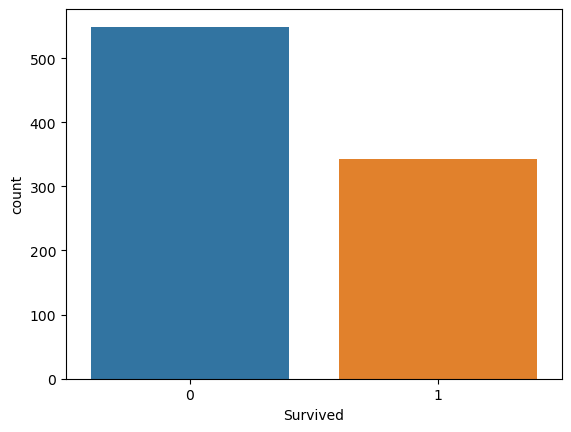

In [40]:
sns.countplot(x='Survived', data=data)

### 2. How many passengers were in first class, Second class and third class.

In [41]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [42]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [43]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

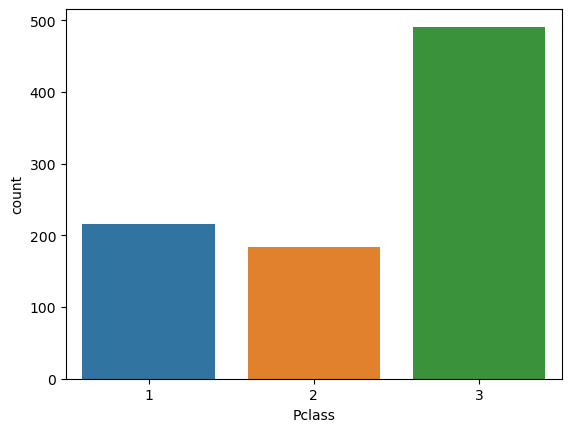

In [44]:
sns.countplot(x='Pclass', data=data)

### 3. Find the number of male and female passengers.

In [45]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [47]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [48]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

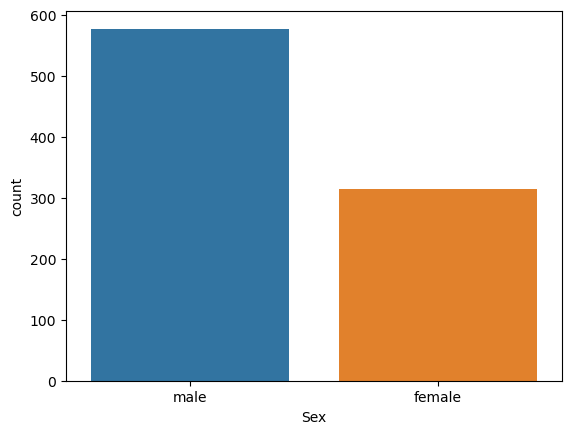

In [49]:
sns.countplot(x='Sex', data=data)

#### Analyzing a numerical column.

In [50]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [51]:
data['Age'].nunique()

89

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

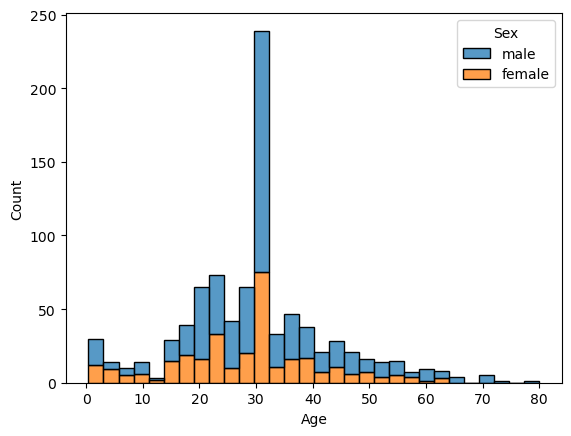

In [54]:
sns.histplot(x='Age', data=data, hue='Sex', multiple='stack')

### Using kdeplot()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

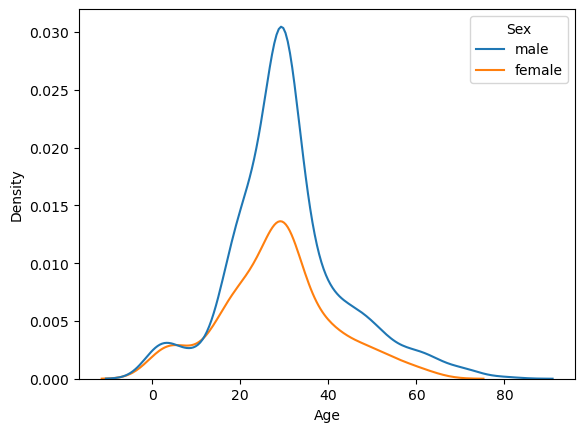

In [56]:
sns.kdeplot(x='Age', data=data, hue='Sex')

## Bivariate Analysis

In [59]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

### 1. Who has better chance of survival male or female?

<Axes: xlabel='Sex', ylabel='Survived'>

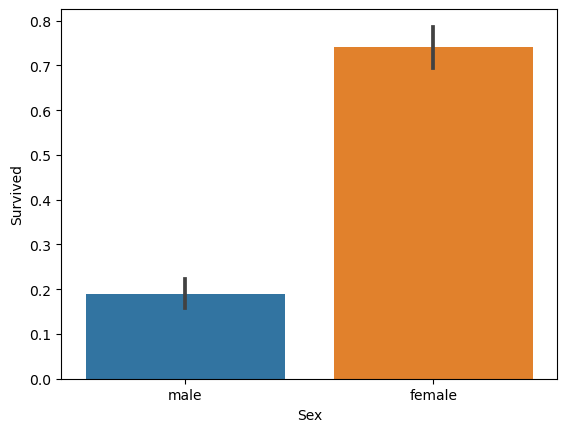

In [60]:
sns.barplot(x='Sex', y='Survived', data=data)

### 2. Which passenger class has better chance of survival?

<Axes: xlabel='Pclass', ylabel='Survived'>

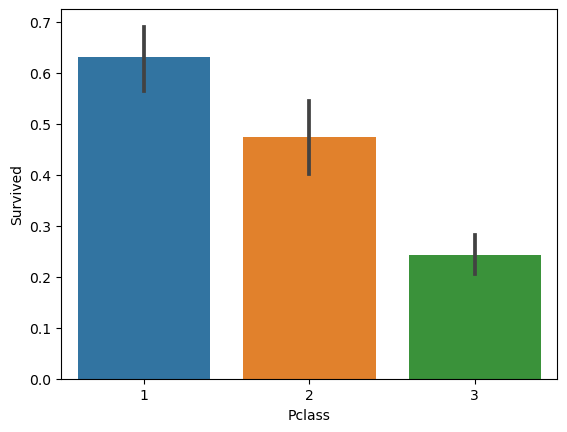

In [61]:
sns.barplot(x='Pclass', y='Survived', data=data)

## Feature Engineering
Feature engineering is the process of transforming raw data into relevant information for use by machine learning models. In other words, feature engineering is the process of creating predictive model features. A feature—also called a dimension—is an input variable used to generate model predictions.

In [62]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

`SibSp` ---> numbers of siblings and spouse(wife)
`Parch` ---> numbers of children and parents.</br>
Combining this two columns.

In [63]:
data['Family_size'] = data['SibSp'] + data['Parch']

In [64]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,S,1,0


### finding the fair per person.

In [65]:
data['Fare_per_person'] = data['Fare']/(data['Family_size']+1)

In [66]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Family_size,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,S,1,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C,0,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,S,0,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,S,1,0,8.05000
